In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [30]:
df = pd.read_csv('Geologic_DataSet.csv')
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,1.640190,0.888564
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,1.164032,-0.003779
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,0.806914,-0.227470
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,0.806914,-0.227470
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,0.568835,-0.862267
...,...,...,...,...,...,...,...
433,-1.151862,-0.579552,0.196118,-0.530778,0.539195,0.568835,-0.399167
434,-0.559012,0.878715,-0.306219,1.072538,-0.402962,-0.859639,0.182428
435,-0.032034,0.968917,-0.306219,0.270880,-0.717014,-0.978678,-1.121022
436,-0.526075,0.502873,-1.059724,1.339758,0.539195,-0.502520,0.558470


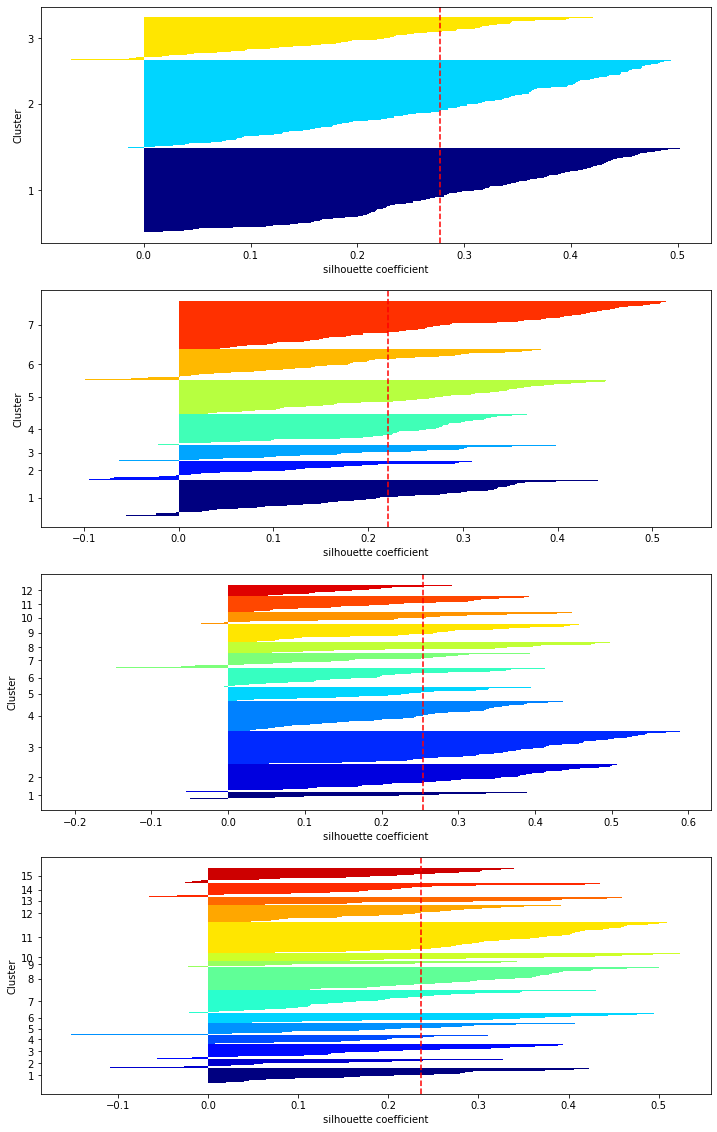

In [90]:
clusters = [3,7,12,15]
sse = []

fig,ax = plt.subplots(4,figsize=(12,20))

for no, x in enumerate(clusters):
    km = KMeans(n_clusters=x)
    labels = km.fit_predict(df)
    sse.append(km.inertia_)
    silhouette_vals=silhouette_samples(df,labels,metric='euclidean')
    cluster_labels=np.unique(labels)
    n_clusters=cluster_labels.shape[0]
    
    y_ax_lower, y_ax_upper=0,0
    yticks=[]
    for i, c in enumerate (cluster_labels):
        c_silhouette_vals= silhouette_vals[labels==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color= cm.jet(float(i)/n_clusters)
        ax[no].barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg=np.mean(silhouette_vals)
    ax[no].axvline(silhouette_avg,color="red",linestyle="--")
    ax[no].set_yticks(yticks)
    ax[no].set_yticklabels(cluster_labels + 1)
    ax[no].set_ylabel('Cluster')
    ax[no].set_xlabel('silhouette coefficient')
    no =+ 1




Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

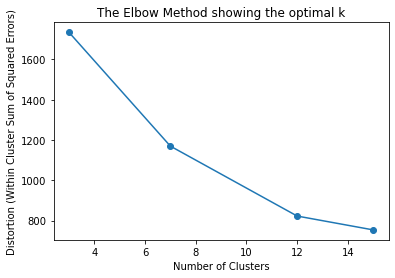

In [82]:
fig1, ax1 = plt.subplots()
ax1.plot(clusters,sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

